In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
pd.set_option('display.max_columns',500)
pd.set_option('display.max_row',500)
pd.set_option('display.width', 1000)

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Melbourne_housing_FULL.csv")
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
cat_col=df.select_dtypes("object")
for i in cat_col:
  df[i]=df[i].astype("category")
df.info()

In [ ]:
num_but_cat=[col for col in df.select_dtypes(["int","float"]) if df[col].nunique() > 10 and df[col].nunique() <20 and df[col].dtypes != "O"]
cat_but_card=[col for col in df.select_dtypes("category") if df[col].nunique()>20]
print(cat_col.columns)
cat_col=[col for col in cat_col if col not in cat_but_card]
num_but_cat,cat_but_card,cat_col

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.shape

In [ ]:
df[df['Price'].isna()]

In [ ]:
suburb_col = df['Suburb'].unique()

for col in suburb_col:
    mask = (df['Suburb'] == col) & (df['Price'].isna())
    mean = df[(df['Suburb'] == col) & ~df['Price'].isna()]['Price'].mean()
    df.loc[mask, 'Price'] = mean
df.isna().sum()

In [ ]:
for col in suburb_col:

    mask = (df['Suburb'] == col) & (df['BuildingArea'].isna())
    mean = df[(df['Suburb'] == col) & ~df['BuildingArea'].isna()]['BuildingArea'].mean()
    df.loc[mask, 'BuildingArea'] = mean

df.isna().sum()

In [ ]:
for col in suburb_col:

    mask = (df['Suburb'] == col) & (df['Landsize'].isna())
    mean = df[(df['Suburb'] == col) & ~df['Landsize'].isna()]['Landsize'].mean()
    df.loc[mask, 'Landsize'] = mean

df.isna().sum()

In [ ]:
for col in suburb_col:

    mask = (df['Suburb'] == col) & (df['Lattitude'].isna())
    mean = df[(df['Suburb'] == col) & ~df['Lattitude'].isna()]['Lattitude'].mean()
    df.loc[mask, 'Lattitude'] = mean

df.isna().sum()

In [ ]:
for col in suburb_col:

    mask = (df['Suburb'] == col) & (df['Longtitude'].isna())
    mean = df[(df['Suburb'] == col) & ~df['Longtitude'].isna()]['Longtitude'].mean()
    df.loc[mask, 'Longtitude'] = mean

df.isna().sum()

In [ ]:
for col in suburb_col:

    mask = (df['Suburb'] == col) & (df['Bedroom2'].isna())
    min = df[(df['Suburb'] == col) & ~df['Bedroom2'].isna()]['Bedroom2'].min()
    df.loc[mask, 'Bedroom2'] = min

df.isna().sum()

In [ ]:
for col in suburb_col:

    mask = (df['Suburb'] == col) & (df['YearBuilt'].isna())
    min = df[(df['Suburb'] == col) & ~df['YearBuilt'].isna()]['YearBuilt'].min()
    df.loc[mask, 'YearBuilt'] = min

df.isna().sum()

In [ ]:
for col in suburb_col:

    mask = (df['Suburb'] == col) & (df['Bathroom'].isna())
    min = df[(df['Suburb'] == col) & ~df['Bathroom'].isna()]['Bathroom'].min()
    df.loc[mask, 'Bathroom'] = min

df.isna().sum()

In [ ]:
for col in suburb_col:

    mask = (df['Suburb'] == col) & (df['Car'].isna())
    min = df[(df['Suburb'] == col) & ~df['Car'].isna()]['Car'].min()
    df.loc[mask, 'Car'] = min

df.isna().sum()

In [ ]:
df.describe().T

##Outlier Detection

In [ ]:
outlier_col=df.select_dtypes(['int','float']).columns
print(len(outlier_col))
sns.boxplot(df,x=outlier_col[0])

In [ ]:
sns.boxplot(df,x=outlier_col[1])

In [ ]:
sns.boxplot(df,x=outlier_col[2])

In [ ]:
sns.boxplot(df,x=outlier_col[3])

In [ ]:
sns.boxplot(df,x=outlier_col[4])

In [ ]:
sns.boxplot(df,x=outlier_col[5])

In [ ]:
sns.boxplot(df,x=outlier_col[6])

In [ ]:
sns.boxplot(df,x=outlier_col[7])

In [ ]:
sns.boxplot(df,x=outlier_col[8])

In [ ]:
sns.boxplot(df,x=outlier_col[9])

In [ ]:
sns.boxplot(df,x=outlier_col[10])

In [ ]:
sns.boxplot(df,x=outlier_col[11])

In [ ]:
sns.boxplot(df,x=outlier_col[12])

In [ ]:
#Outlier Detection
Threshold = 3

for col in df.select_dtypes(['int', 'float']):
    Z = np.abs((df[col] - df[col].mean()) / df[col].std())
    df[col] = np.where(Z > Threshold, np.nan, df[col])


In [ ]:
for col in outlier_col:
  QIR=df[col].quantile(0.75)-df[col].quantile(0.25)
  lower=df[col].mean()-1.5*QIR
  upper=df[col].mean()+1.5*QIR
  print(f"Outlier Data {col} :{len(df[(df[col]>upper) | (df[col]<lower)])}")
  df=df[(df[col]<=upper) & (df[col]>=lower)]
  df[col].max(),upper

In [ ]:
sns.boxplot(df,x=outlier_col[0])

In [ ]:
sns.boxplot(df,x=outlier_col[1])

In [ ]:
sns.boxplot(df,x=outlier_col[2])

In [ ]:
sns.boxplot(df,x=outlier_col[3])

In [ ]:
sns.boxplot(df,x=outlier_col[4])

In [ ]:
sns.boxplot(df,x=outlier_col[5])

In [ ]:
sns.boxplot(df,x=outlier_col[6])

In [ ]:
sns.boxplot(df,x=outlier_col[7])

In [ ]:
sns.boxplot(df,x=outlier_col[8])

In [ ]:
sns.boxplot(df,x=outlier_col[9])

In [ ]:
sns.boxplot(df,x=outlier_col[10])

In [ ]:
sns.boxplot(df,x=outlier_col[11])

In [ ]:
sns.boxplot(df,x=outlier_col[12])

In [ ]:
sns.histplot(data=df,x='Price',kde=True)

In [ ]:
ax=sns.barplot(data=df,x='Regionname',y='Rooms',hue='Type',errwidth=0)
for p in ax.patches:
   ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0,10),
                textcoords = 'offset points',
                fontweight='bold')

In [ ]:
df2=df.select_dtypes(['int','float'])
sns.pairplot(data=df2,hue='Price')

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
for col in cat_col:
  df[col]=encoder.fit_transform(df[col])

for col in cat_but_card:
    df[col]=encoder.fit_transform(df[col])

<Axes: >

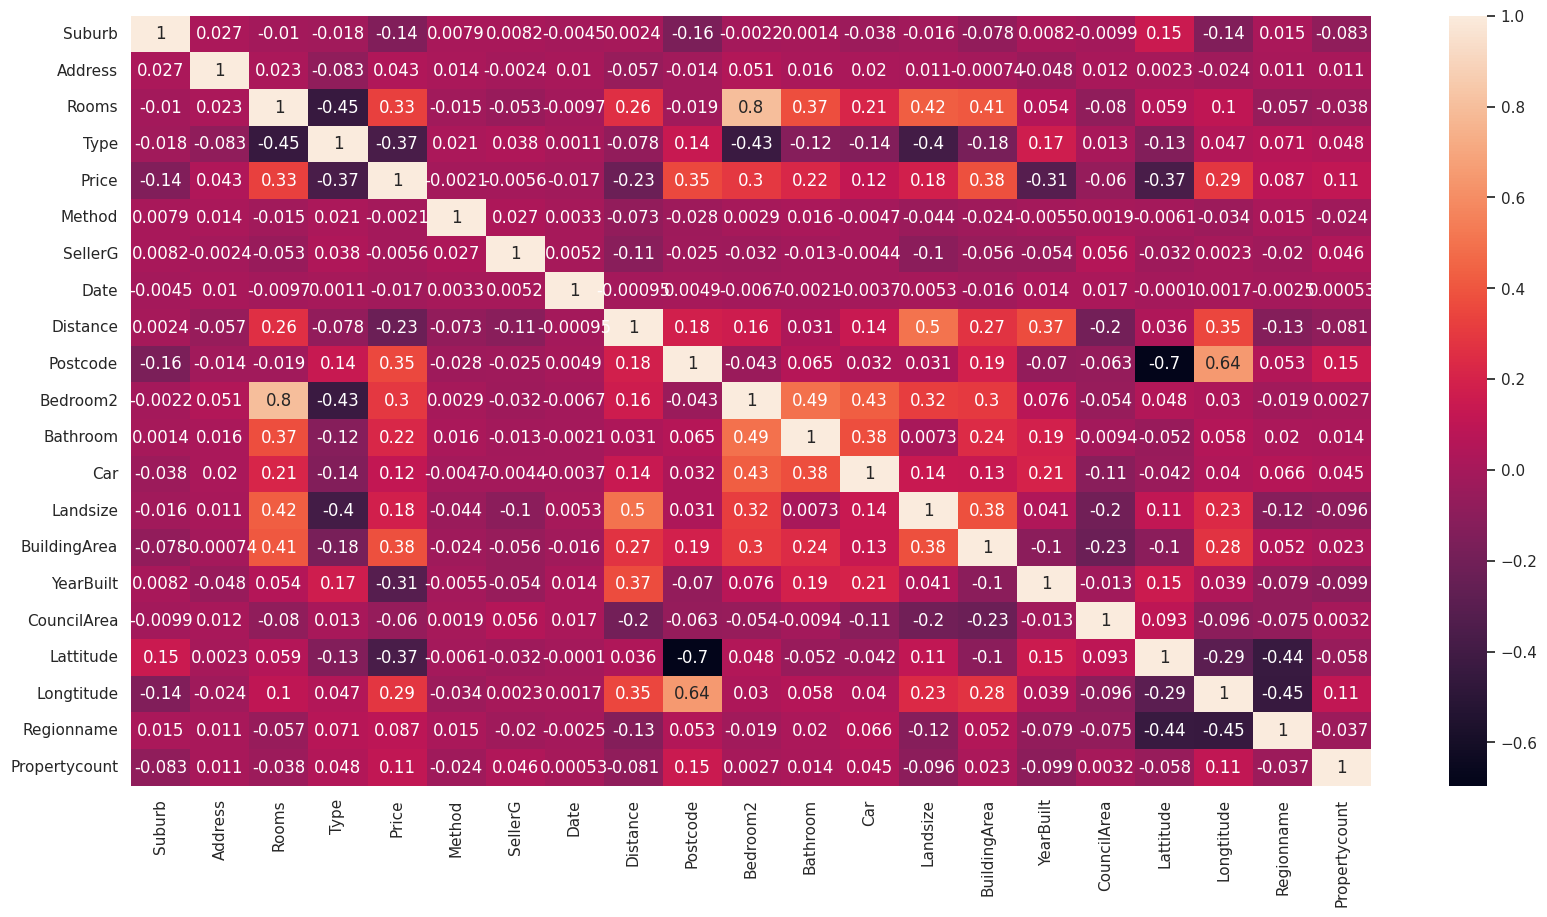

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),linewidths=0,annot=True)

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,LassoCV,RidgeCV,Lasso,ElasticNet,ElasticNetCV
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor,KernelDensity

In [ ]:
y=df['Price'].values
X=df.drop('Price',axis=1).values

In [ ]:
sc=MinMaxScaler()
X=sc.fit_transform(X)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,X_test.shape

((12082, 20), (3021, 20))

In [ ]:
Y_train.shape,Y_test.shape

((12082,), (3021,))

##Linear Regression

In [ ]:
lin_reg=LinearRegression().fit(X_train,Y_train)

In [ ]:
lin_reg.coef_

array([ -60478.22238512,  -11233.14810541,  345022.65808598,
       -298239.5816756 ,   -7818.25594936,  -18364.31157743,
        -17937.10077234, -962808.41688782,  207160.05536533,
        -19863.50901705,   97925.97927758,   32277.15981479,
        224841.35615213,  359541.31737537,  -88492.57486526,
        -14138.51434411, -275966.06717457,  449819.85648462,
         89551.48479995,   48280.83049313])

In [ ]:
lin_reg.intercept_

859539.5685288039

In [ ]:
Y_pred=lin_reg.predict(X_test)
lin_reg_result=mean_squared_error(Y_test,Y_pred)
lin_reg_R2=r2_score(Y_test,Y_pred)
print(f"MSE : {lin_reg_result}\nMAE : {mean_absolute_error(Y_test,Y_pred)}\nRMSE : {np.sqrt(mean_squared_error(Y_test,Y_pred))}")
print(f"R2_Score : {lin_reg_R2}")


MSE : 56456196020.59869
MAE : 183398.29703607317
RMSE : 237605.1262506739
R2_Score : 0.6127983471156544


In [ ]:
lin_reg_cv=np.mean(-cross_val_score(lin_reg,X_train,Y_train,cv=10,scoring='neg_mean_squared_error'))
print(f"Linear Regression CV : {lin_reg_cv}")

Linear Regression CV : 59630889915.28963


##Lasso Model

In [ ]:
Lasso_reg=Lasso()
Lasso_model_cv=LassoCV(max_iter=1000,cv=10).fit(X_train,Y_train).fit(X_train,Y_train)


In [ ]:
Lasso_model_cv.alpha_  #en iyi lambda değeri

57.374605335382675

In [ ]:
Lasso_reg=Lasso_reg.set_params(alpha=Lasso_model_cv.alpha_ ).fit(X_train,Y_train)

In [ ]:
Y_test=Lasso_reg.predict(X_test)
Lasso_Reg_Result=mean_squared_error(Y_test,Y_pred)
Lasso_Reg_R2=r2_score(Y_test,Y_pred)
print(f"MSE : {Lasso_Reg_Result}\nMAE : {mean_absolute_error(Y_test,Y_pred)}\nRMSE : {np.sqrt(mean_squared_error(Y_test,Y_pred))}")
print(f"R2_Score : {Lasso_Reg_R2}")

MSE : 1750357.7586305155
MAE : 989.7580357991619
RMSE : 1323.0108686743717
R2_Score : 0.9999812628260925


In [ ]:
np.mean(-cross_val_score(Lasso_reg,X_train,Y_train,scoring='neg_mean_squared_error',cv=10))

59633004693.52922

#Ridge Model

In [ ]:
lambdalar=10**np.linspace(10,-2,1000)*0.5

In [ ]:
Ridge_reg=Ridge()
Ridge_reg_cv=RidgeCV(alphas=lambdalar,cv=10,scoring="neg_mean_squared_error").fit(X_train,Y_train)
Ridge_reg_cv.alpha_

0.42944142797731294

In [ ]:
Ridge_reg=Ridge_reg.set_params(alpha=Ridge_reg_cv.alpha_).fit(X_train,Y_train)
Y_test=Ridge_reg.predict(X_test)

In [ ]:
Ridge_Reg_Result=mean_squared_error(Y_test,Y_pred)
Ridge_reg_R2=r2_score(Y_test,Y_pred)
print(f"MSE : {Ridge_Reg_Result}\nMAE : {mean_absolute_error(Y_test,Y_pred)}\nRMSE : {np.sqrt(mean_squared_error(Y_test,Y_pred))}")
print(f"R2_Score : {Ridge_reg_R2}")

MSE : 103385.02212917586
MAE : 249.6954767157937
RMSE : 321.5354134915404
R2_Score : 0.9999988968762259


In [ ]:
np.mean(-cross_val_score(Ridge_reg,X_train,Y_train,scoring='neg_mean_squared_error',cv=10))

59630760959.72286

##ElasticNet Algorithm

In [ ]:
Elastic_model=ElasticNet()
Elastic_model_cv=ElasticNetCV(cv=10).fit(X_train,Y_train)
Elastic_model_cv.alpha_

114.74921067076542

In [ ]:
Elastic_model=Elastic_model.set_params(alpha=Elastic_model_cv.alpha_).fit(X_train,Y_train)
Y_test=Elastic_model.predict(X_test)

In [ ]:
Elastic_model_Result=mean_squared_error(Y_test,Y_pred)
Elastic_model_R2=r2_score(Y_test,Y_pred)
print(f"MSE : {Elastic_model_Result}\nMAE : {mean_absolute_error(Y_test,Y_pred)}\nRMSE : {np.sqrt(mean_squared_error(Y_test,Y_pred))}")
print(f"R2_Score : {Elastic_model_R2}")

MSE : 93491554938.3493
MAE : 247168.3115969617
RMSE : 305763.8875641617
R2_Score : -133328.99743961933


In [ ]:
np.mean(-cross_val_score(Elastic_model,X_train,Y_train,scoring='neg_mean_squared_error',cv=10))

150185397030.82562

##KNN Algorithm

In [ ]:
KNN_model=KNeighborsRegressor().fit(X_train,Y_train)
Y_test=KNN_model.predict(X_test)

In [ ]:
KNN_model_Result=mean_squared_error(Y_test,Y_pred)
KNN_model_R2=r2_score(Y_test,Y_pred)
print(f"MSE : {KNN_model_Result}\nMAE : {mean_absolute_error(Y_test,Y_pred)}\nRMSE : {np.sqrt(mean_squared_error(Y_test,Y_pred))}")
print(f"R2_Score : {KNN_model_R2}")

MSE : 25287617414.172554
MAE : 124877.77784385231
RMSE : 159020.80811696485
R2_Score : 0.7615226299279694


In [ ]:
np.mean(-cross_val_score(KNN_model,X_train,Y_train,scoring='neg_mean_squared_error',cv=10))

58930443888.099655

##Random Forest Algorithm

In [ ]:
rand_forest_reg=RandomForestRegressor()
rand_forest_cv=GridSearchCV(rand_forest_reg,param_grid= {"n_estimators": [3, 10, 20, 50],"n_jobs": [2, 3, 4, 10]},cv=5,scoring='neg_mean_squared_error').fit(X_train,Y_train)
rand_forest_cv.best_params_

{'n_estimators': 50, 'n_jobs': 4}

In [ ]:
rand_forest_reg=rand_forest_reg.set_params(n_estimators=rand_forest_cv.best_params_['n_estimators'],max_depth=5).fit(X_train,Y_train)
Y_test=rand_forest_reg.predict(X_test)
rand_forest_reg_Result=mean_squared_error(Y_test,Y_pred)
rand_forest_reg_R2=r2_score(Y_test,Y_pred)
print(f"MSE : {rand_forest_reg_Result}\nMAE : {mean_absolute_error(Y_test,Y_pred)}\nRMSE : {np.sqrt(mean_squared_error(Y_test,Y_pred))}")
print(f"R2_Score : {rand_forest_reg_R2}")

MSE : 20203316481.93703
MAE : 110184.6531331132
RMSE : 142138.37089940574
R2_Score : 0.7660200702738414


In [ ]:
np.mean(-cross_val_score(rand_forest_reg,X_train,Y_train,scoring='neg_mean_squared_error',cv=10))

55462546183.053505

In [ ]:
Gradient_boosting_reg=GradientBoostingRegressor().fit(X_train,Y_train)
Y_test=Gradient_boosting_reg.predict(X_test)

In [ ]:
Gradient_boosting_reg_Result=mean_squared_error(Y_test,Y_pred)
Gradient_boosting_reg_R2=r2_score(Y_test,Y_pred)
print(f"MSE : {Gradient_boosting_reg_Result}\nMAE : {mean_absolute_error(Y_test,Y_pred)}\nRMSE : {np.sqrt(mean_squared_error(Y_test,Y_pred))}")
print(f"R2_Score : {Gradient_boosting_reg_R2}")

MSE : 12557190192.526012
MAE : 87417.51871483294
RMSE : 112058.86931664987
R2_Score : 0.8744943932408963


In [ ]:
np.mean(-cross_val_score(Gradient_boosting_reg,X_train,Y_train,scoring='neg_mean_squared_error',cv=10))

43807484985.78056

##AdaBoostRegressor

In [ ]:
Ada_boost_reg=AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2).fit(X_train,Y_train)
Y_test=Ada_boost_reg.predict(X_test)

In [ ]:
Ada_boost_reg_Result=mean_squared_error(Y_test,Y_pred)
Ada_boost_R2=r2_score(Y_test,Y_pred)
print(f"MSE : {Ada_boost_reg_Result}\nMAE : {mean_absolute_error(Y_test,Y_pred)}\nRMSE : {np.sqrt(mean_squared_error(Y_test,Y_pred))}")
print(f"R2_Score : {Ada_boost_R2}")

MSE : 25786407249.484158
MAE : 125794.57602997258
RMSE : 160581.4660833689
R2_Score : 0.5758447588244852


In [ ]:
np.mean(-cross_val_score(Ada_boost_reg,X_train,Y_train,scoring='neg_mean_squared_error',cv=10))

68373153901.95109

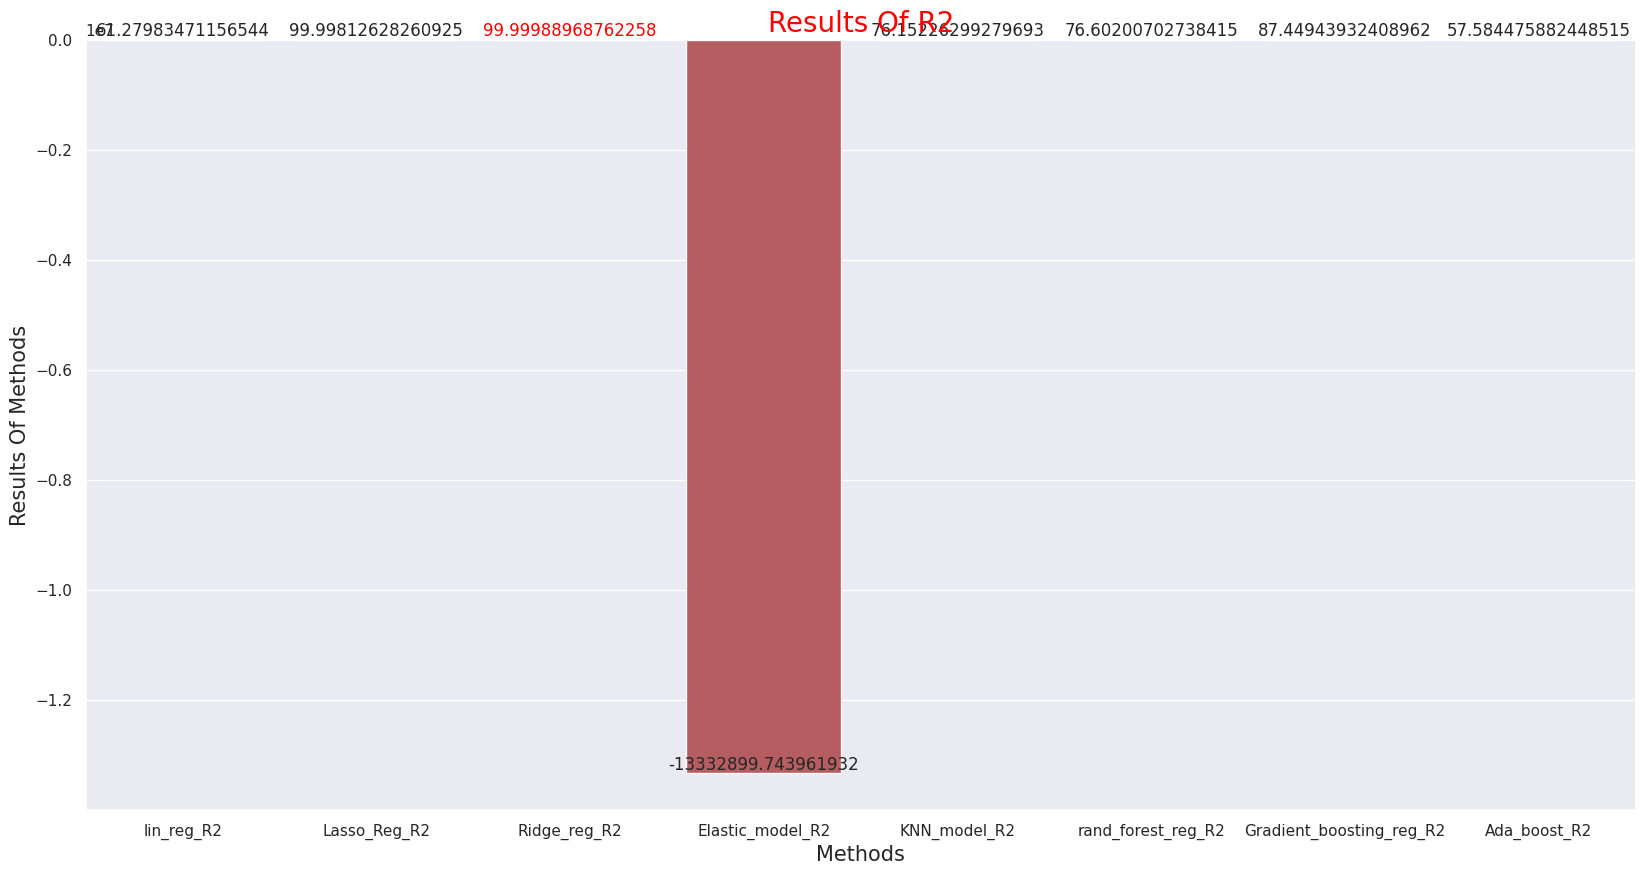

In [ ]:
plt.figure(figsize=(20,10))
R2_score=[lin_reg_R2,Lasso_Reg_R2,Ridge_reg_R2,Elastic_model_R2,KNN_model_R2,rand_forest_reg_R2,Gradient_boosting_reg_R2,Ada_boost_R2]
percantage=[i*100 for i in R2_score]
method=["lin_reg_R2","Lasso_Reg_R2","Ridge_reg_R2","Elastic_model_R2","KNN_model_R2","rand_forest_reg_R2","Gradient_boosting_reg_R2","Ada_boost_R2"]

sns.barplot(x=method,y=percantage)
plt.title("Results Of R2",color="red",size=20)
plt.xlabel("Methods",size=15)
plt.ylabel("Results Of Methods",size=15)

for index,label,result in zip([i for i in range(0,len(method))],method,percantage):
  if result==max(percantage):
     plt.text(index,result,str(result),ha="center",va="bottom",color="red")
  else:
     plt.text(index,result,str(result),ha="center",va="bottom")